# ORIE 5258 / Homework 3: KNN

#### Students: Vishakha Korde (vk369) and Luis Alonso Cendra Villalobos (lc2234)

**Stocks chosen:** AAPL, AMZN, AVGO, BRK, GOOG, HD, JNJ, JPM, LLY, MA, META, MSFT, NVDA, ORCL, PG, TSLA, UNH, V, WMT, XOM

**Stock to be predicted:** AAPL

**Time series:**

Start = 1/1/2018

End = 11/04/2023

In [419]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [420]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.ndimage import shift


In [421]:
# creating pandas dataframe for each stock

path = '/content/drive/MyDrive/ORIE5258 - Python for Finance/HW3/'

AAPL = pd.read_csv(path + 'AAPL.csv')
AAPL.Name = 'AAPL'
AMZN = pd.read_csv(path + 'AMZN.csv')
AMZN.Name = 'AMZN'
AVGO = pd.read_csv(path + 'AVGO.csv')
AVGO.Name = 'AVGO'
BRK  = pd.read_csv(path + 'BRK.csv')
BRK.Name = 'BRK'
GOOG = pd.read_csv(path + 'GOOG.csv')
GOOG.Name = 'GOOG'
HD   = pd.read_csv(path + 'HD.csv')
HD.Name = 'HD'
JNJ  = pd.read_csv(path + 'JNJ.csv')
JNJ.Name = 'JNJ'
JPM  = pd.read_csv(path + 'JPM.csv')
JPM.Name = 'JPM'
LLY  = pd.read_csv(path + 'LLY.csv')
LLY.Name = 'LLY'
MA   = pd.read_csv(path + 'MA.csv')
MA.Name = 'MA'
META = pd.read_csv(path + 'META.csv')
META.Name = 'META'
MSFT = pd.read_csv(path + 'MSFT.csv')
MSFT.Name = 'MSFT'
NVDA = pd.read_csv(path + 'NVDA.csv')
NVDA.Name = 'NVDA'
ORCL = pd.read_csv(path + 'ORCL.csv')
ORCL.Name = 'ORCL'
PG   = pd.read_csv(path + 'PG.csv')
PG.Name = 'PG'
TSLA = pd.read_csv(path + 'TSLA.csv')
TSLA.Name = 'TSLA'
UNH  = pd.read_csv(path + 'UNH.csv')
UNH.Name = 'UNH'
V    = pd.read_csv(path + 'V.csv')
V.Name = 'V'
WMT  = pd.read_csv(path + 'WMT.csv')
WMT.Name = 'WMT'
XOM  = pd.read_csv(path + 'XOM.csv')
XOM.Name = 'XOM'

In [422]:
# List of stocks
dataframes = [AAPL, AMZN, AVGO, BRK, GOOG, HD, JNJ, JPM, LLY, MA, META, MSFT, NVDA, ORCL, PG, TSLA, UNH, V, WMT, XOM]

# Computing % returns for each stock
for df in dataframes:
    df[df.Name] = df['Adj Close']

In [423]:
# Merge DataFrames for all asset prices
for df in dataframes:
  asset_prices = pd.concat([AAPL['Date'], AAPL['AAPL'], AMZN['AMZN'], AVGO['AVGO'], BRK['BRK'], GOOG['GOOG'], HD['HD'],
              JNJ['JNJ'], JPM['JPM'], LLY['LLY'], MA['MA'], META['META'], MSFT['MSFT'],
              NVDA['NVDA'], ORCL['ORCL'], PG['PG'], TSLA['TSLA'], UNH['UNH'], V['V'],
              WMT['WMT'], XOM['XOM']], axis=1)

# Calculate returns data for 1 day window

# Computing % returns for each stock
for df in dataframes:
    df[df.Name] = df['Adj Close'].shift(-1) / df['Adj Close'] - 1


# Merge DataFrames for all asset returns
for df in dataframes:
  asset_returns = pd.concat([AAPL['Date'].shift(-1), AAPL['AAPL'], AMZN['AMZN'], AVGO['AVGO'], BRK['BRK'], GOOG['GOOG'], HD['HD'],
              JNJ['JNJ'], JPM['JPM'], LLY['LLY'], MA['MA'], META['META'], MSFT['MSFT'],
              NVDA['NVDA'], ORCL['ORCL'], PG['PG'], TSLA['TSLA'], UNH['UNH'], V['V'],
              WMT['WMT'], XOM['XOM']], axis=1)

# Fill NaN values with zeros
asset_returns = asset_returns.fillna(0)

#Remove the last line because its filled with zeros
asset_returns = asset_returns.iloc[:-1]

# Print the asset returns
print(asset_returns.iloc[:, :])


            Date      AAPL      AMZN      AVGO       BRK      GOOG        HD  \
0     2018-01-03 -0.000174  0.012775  0.010936  0.013031  0.016413  0.005212   
1     2018-01-04  0.004645  0.004476  0.000333  0.004505  0.003621  0.007936   
2     2018-01-05  0.011386  0.016163  0.005926  0.003637  0.014571  0.010446   
3     2018-01-08 -0.003714  0.014425  0.002393  0.006554  0.004273 -0.002390   
4     2018-01-09 -0.000115  0.004676 -0.013847  0.001381 -0.000614  0.005520   
...          ...       ...       ...       ...       ...       ...       ...   
1465  2023-10-30  0.012305  0.038907  0.003447  0.017184  0.019044  0.018158   
1466  2023-10-31  0.002819  0.002863  0.000143  0.011618 -0.003579  0.011404   
1467  2023-11-01  0.018739  0.029379  0.013751  0.007090  0.018116  0.006814   
1468  2023-11-02  0.020693  0.007810  0.021526  0.015331  0.007917  0.027562   
1469  2023-11-03 -0.005181  0.003839  0.013061  0.007994  0.013921  0.003667   

           JNJ       JPM       LLY  ...

In [424]:
#This formula will calculate the returns for a rolling window, and will be used for the 1 month and 1 week periods

def calculate_cumulative_returns(returns, window_size):
    cumulative_returns = []
    for i in range(len(returns) - window_size + 1):
        current_window = returns[i:i+window_size]
        cumulative_return = np.prod(1 + current_window) - 1
        cumulative_returns.append(cumulative_return)
    return np.array(cumulative_returns)

## 1-day Test-train

In [425]:
#Split data into two sets (training = all data up until the last day of Sept 23, test = all data until Nov 3rd, 2023)
data_test, data_train = [d for _, d in asset_returns.groupby(asset_returns['Date']<='2023-09-29')]

# training data (Until September 29th, 2023)
y_train = np.asarray(data_train['AAPL'].shift(1))  # AAPL = N-th Asset. We shift ahead to make y_t regression on x_t-1
y_train = y_train[1:] # Remove the first element as it has an N/A
X_train = np.asarray(data_train.iloc[:, 1:])    # All 20 instruments
X_train = X_train[:-1] #Eliminate one row to match shapes with y

# testing data (October 1st - Nov 3rd, 2023)
y_test = np.asarray(data_test['AAPL'].shift(1))  # AAPL = N-th Asset. We shift ahead to make y_t regression on x_t-1
y_test = y_test[1:] # Remove the first element as it has an N/A
X_test = np.asarray(data_test.iloc[:, 1:])    # All 20 instruments
X_test = X_test[:-1]#Eliminate one row to match shapes with y


The optimal k that minimizes RMSE is:  19
Optimal RMSE: 0.0038407833702370055


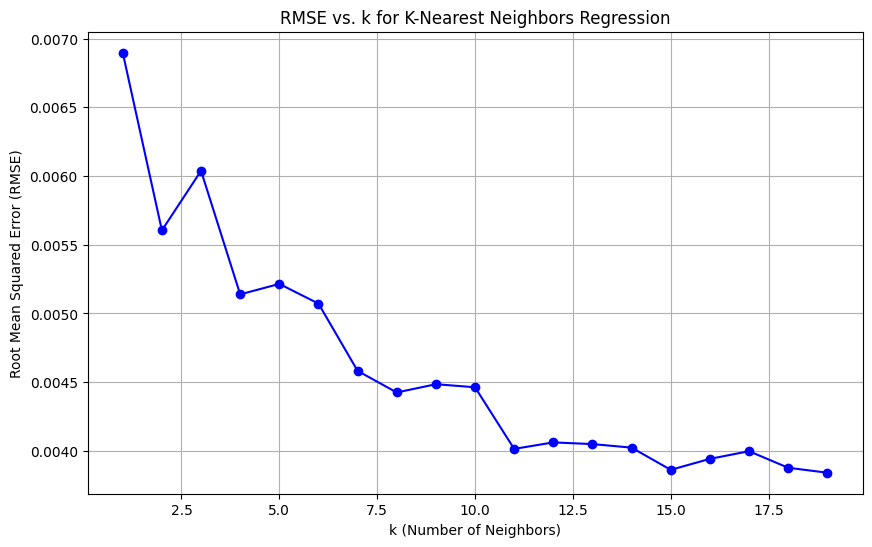

In [426]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Define a range of values for k
# k = {1, 2, ..., 19}. Max 19 neighbors
k_values = np.arange(1, 20, 1)

rmse_values = []

for k in k_values:

    knn_model = KNeighborsRegressor(n_neighbors=k)

    # Fit the model on the train data
    knn_model.fit(X_train, y_train)

    # Test the model on test data
    y_pred = knn_model.predict(X_test)

    # Get RMSE from the prediction one month ahead
    RMSE = mean_squared_error(y_test, y_pred, squared=False)

    rmse_values.append(RMSE)

# Find the index of the minimum RMSE
star_k_index = np.argmin(rmse_values)
star_k = k_values[star_k_index]
star_rmse = rmse_values[star_k_index]

print("The optimal k that minimizes RMSE is: ", star_k)
print("Optimal RMSE:", star_rmse)

plt.figure(figsize=(10, 6))
plt.plot(k_values, rmse_values, marker='o', linestyle='-', color='b')
plt.title('RMSE vs. k for K-Nearest Neighbors Regression')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.grid(True)
plt.show()

## 1-week Test-train


In [427]:
# Recalculate return data for a 20 day Lag

# List of stocks
dataframes = [AAPL, AMZN, AVGO, BRK, GOOG, HD, JNJ, JPM, LLY, MA, META, MSFT, NVDA, ORCL, PG, TSLA, UNH, V, WMT, XOM]

# Computing % returns for each stock
for df in dataframes:
    df[df.Name] = df['Adj Close']

# Computing % returns for each stock
for df in dataframes:
    df[df.Name] = df['Adj Close'].shift(-4) / df['Adj Close'] - 1


# Merge DataFrames for all asset returns. Shift date so it fits the returns.
for df in dataframes:
  asset_returns = pd.concat([AAPL['Date'].shift(-4), AAPL['AAPL'], AMZN['AMZN'], AVGO['AVGO'], BRK['BRK'], GOOG['GOOG'], HD['HD'],
              JNJ['JNJ'], JPM['JPM'], LLY['LLY'], MA['MA'], META['META'], MSFT['MSFT'],
              NVDA['NVDA'], ORCL['ORCL'], PG['PG'], TSLA['TSLA'], UNH['UNH'], V['V'],
              WMT['WMT'], XOM['XOM']], axis=1)

# Fill NaN values with zeros
asset_returns = asset_returns.fillna(0)

#Remove the last 19 lines because its filled with zeros
asset_returns = asset_returns.iloc[:-4]

# Print the asset returns
print(asset_returns.iloc[:, :])

            Date      AAPL      AMZN      AVGO       BRK      GOOG        HD  \
0     2018-01-08  0.012133  0.048662  0.019700  0.027989  0.039380  0.021326   
1     2018-01-09  0.012193  0.040276 -0.005298  0.016167  0.021968  0.021639   
2     2018-01-10  0.007282  0.036988 -0.026628  0.024515  0.014921  0.006772   
3     2018-01-11  0.001600  0.038677 -0.029895  0.026164  0.002985  0.011325   
4     2018-01-12  0.015715  0.046781 -0.029309  0.036599  0.013840  0.022808   
...          ...       ...       ...       ...       ...       ...       ...   
1462  2023-10-30 -0.018162  0.032281 -0.045238 -0.003603 -0.102555 -0.006459   
1463  2023-10-31 -0.001929  0.096384 -0.009722  0.013149 -0.010815  0.013384   
1464  2023-11-01  0.042423  0.145772  0.031678  0.022579  0.033458  0.031043   
1465  2023-11-02  0.055582  0.080867  0.039291  0.052184  0.041977  0.065362   
1466  2023-11-03  0.037348  0.044382  0.049248  0.042678  0.036740  0.050199   

           JNJ       JPM       LLY  ...

In [428]:
#Split data into two sets (training = all data up until the last day of Sept 23, test = all data until Nov 3rd, 2023)
data_test, data_train = [d for _, d in asset_returns.groupby(asset_returns['Date']<='2023-09-29')]

# training data (Until September 29th, 2023)
y_train = np.asarray(data_train['AAPL'].shift(1))  # AAPL = N-th Asset
y_train = y_train[1:] # Remove the first element as it has an N/A
X_train = np.asarray(data_train.iloc[:, 1:])    # Other N-1 = 19 instruments
X_train = X_train[:-1]

# testing data (October 1st - Nov 3rd, 2023)
y_test = np.asarray(data_test['AAPL'].shift(1))  # AAPL = N-th Asset. We shift ahead to
y_test = y_test[1:] # Remove the first element as it has an N/A
X_test = np.asarray(data_test.iloc[:, 1:]) # Other N-1 = 19 instruments
X_test = X_test[:-1]

The optimal k that minimizes RMSE is:  6
Optimal RMSE: 0.0670853269149714


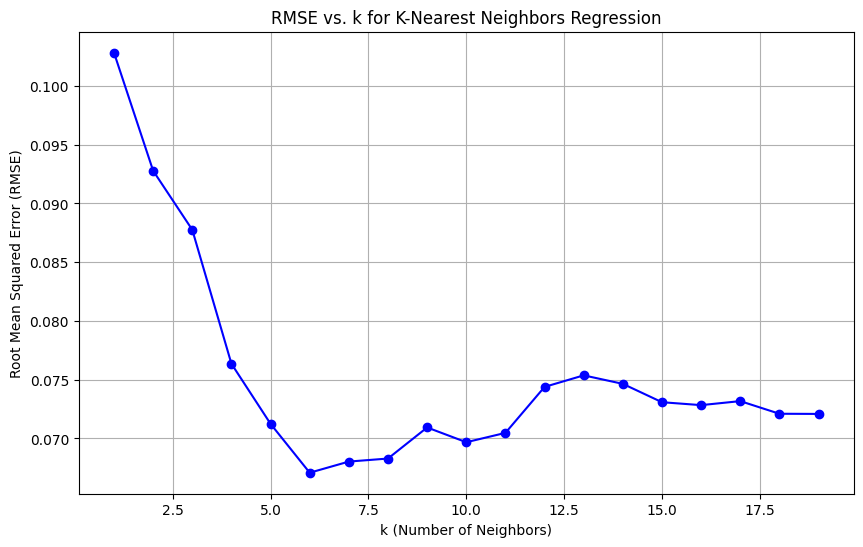

In [429]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Define a range of values for k
# k = {1, 2, ..., 19}. Max 19 neighbors

k_values = np.arange(1, 20, 1)
rmse_values = []

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)

    # Fit the model on the train data
    knn_model.fit(X_train, y_train)

    # Test the model on test data
    y_pred = knn_model.predict(X_test)

    # Calculate the cummulative returns from the test training set
    # cumm_y_pred_1 = [(1+y_pred_1)] * [(1+y_pred_2)] * ... * [(1+y_pred_20)] - 1
    cumulative_y_pred = calculate_cumulative_returns(y_pred, 5)

    # Get RMSE from the prediction one week ahead
    RMSE = mean_squared_error(y_test[4:], cumulative_y_pred, squared=False)


    rmse_values.append(RMSE)

# Find the index of the minimum RMSE
star_k_index = np.argmin(rmse_values)
star_k = k_values[star_k_index]
star_rmse = rmse_values[star_k_index]

print("The optimal k that minimizes RMSE is: ", star_k)
print("Optimal RMSE:", star_rmse)

plt.figure(figsize=(10, 6))
plt.plot(k_values, rmse_values, marker='o', linestyle='-', color='b')
plt.title('RMSE vs. k for K-Nearest Neighbors Regression')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.grid(True)
plt.show()

## 1-month Test-train

In [430]:
# Recalculate return data for a 20 day Lag

# List of stocks
dataframes = [AAPL, AMZN, AVGO, BRK, GOOG, HD, JNJ, JPM, LLY, MA, META, MSFT, NVDA, ORCL, PG, TSLA, UNH, V, WMT, XOM]

# Computing % returns for each stock
for df in dataframes:
    df[df.Name] = df['Adj Close']

# Computing % returns for each stock
for df in dataframes:
    df[df.Name] = df['Adj Close'].shift(-19) / df['Adj Close'] - 1


# Merge DataFrames for all asset returns. Shift date so it fits the returns.
for df in dataframes:
  asset_returns = pd.concat([AAPL['Date'].shift(-19), AAPL['AAPL'], AMZN['AMZN'], AVGO['AVGO'], BRK['BRK'], GOOG['GOOG'], HD['HD'],
              JNJ['JNJ'], JPM['JPM'], LLY['LLY'], MA['MA'], META['META'], MSFT['MSFT'],
              NVDA['NVDA'], ORCL['ORCL'], PG['PG'], TSLA['TSLA'], UNH['UNH'], V['V'],
              WMT['WMT'], XOM['XOM']], axis=1)

# Fill NaN values with zeros
asset_returns = asset_returns.fillna(0)

#Remove the last 19 lines because its filled with zeros
asset_returns = asset_returns.iloc[:-19]

# Print the asset returns
print(asset_returns.iloc[:, :])

            Date      AAPL      AMZN      AVGO       BRK      GOOG        HD  \
0     2018-01-30 -0.030710  0.209258 -0.097487  0.087162  0.092667  0.073286   
1     2018-01-31 -0.027870  0.204858 -0.081132  0.073027  0.080796  0.062907   
2     2018-02-01 -0.030341  0.149150 -0.115658  0.082515  0.074834  0.049289   
3     2018-02-02 -0.082857  0.163374 -0.133054  0.038229  0.008773  0.007637   
4     2018-02-05 -0.102437  0.114791 -0.162229 -0.029299 -0.046199 -0.046501   
...          ...       ...       ...       ...       ...       ...       ...   
1447  2023-10-30 -0.012239  0.064064  0.032424 -0.016412 -0.056639 -0.035829   
1448  2023-10-31 -0.016642  0.047953  0.021316 -0.006867 -0.080502 -0.026335   
1449  2023-11-01 -0.005374  0.087647  0.035297 -0.003796 -0.061916 -0.017381   
1450  2023-11-02  0.000451  0.079009  0.030807  0.007738 -0.073164  0.005840   
1451  2023-11-03 -0.013073  0.080618  0.031313  0.018411 -0.065448  0.000846   

           JNJ       JPM       LLY  ...

In [431]:
#Split data into two sets (training = all data up until the last day of Sept 23, test = all data until Nov 3rd, 2023)
data_test, data_train = [d for _, d in asset_returns.groupby(asset_returns['Date']<'2023-10-06')]

# training data
y_train = np.asarray(data_train['AAPL'].shift(1))  # AAPL = N-th Asset
y_train = y_train[1:] # Remove the first element as it has an N/A
X_train = np.asarray(data_train.iloc[:, 1:])    # Other N-1 = 19 instruments
X_train = X_train[:-1]

# testing data
y_test = np.asarray(data_test['AAPL'].shift(1))  # AAPL = N-th Asset. We shift ahead to
y_test = y_test[1:] # Remove the first element as it has an N/A
X_test = np.asarray(data_test.iloc[:, 1:]) # Other N-1 = 19 instruments
X_test = X_test[:-1]


The optimal k that minimizes RMSE is:  15
Optimal RMSE: 0.02513714777539522


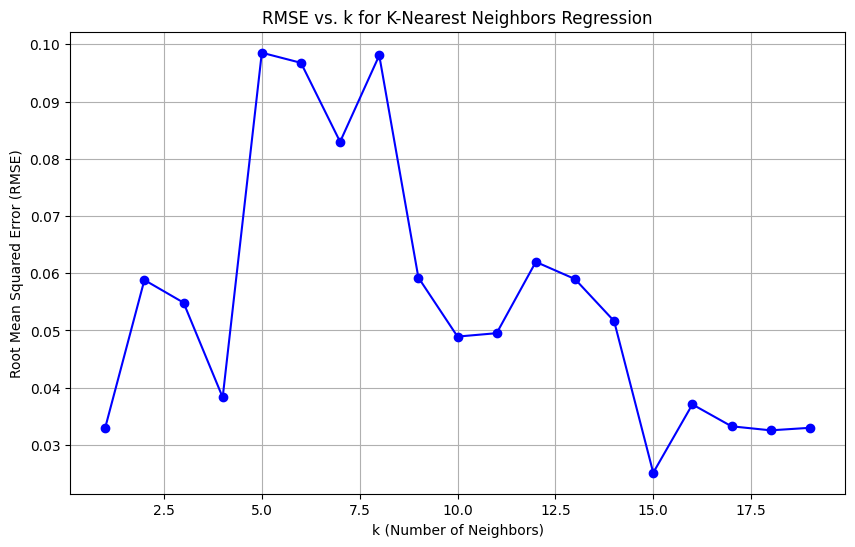

In [432]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Define a range of values for k
# k = {1, 2, ..., 19}. Max 19 neighbors

k_values = np.arange(1, 20, 1)
rmse_values = []

for k in k_values:

    knn_model = KNeighborsRegressor(n_neighbors=k)

    # Fit the model on the train data
    knn_model.fit(X_train, y_train)

    # Test the model on test data
    y_pred = knn_model.predict(X_test)

    # Calculate the cummulative returns from the test training set
    # cumm_y_pred_1 = [(1+y_pred_1)] * [(1+y_pred_2)] * ... * [(1+y_pred_20)] - 1
    cumulative_y_pred = calculate_cumulative_returns(y_pred, 20)

    # Get RMSE from the prediction one month ahead
    RMSE = mean_squared_error(y_test[19:], cumulative_y_pred, squared=False)

    rmse_values.append(RMSE)

# Find the index of the minimum RMSE
star_k_index = np.argmin(rmse_values)
star_k = k_values[star_k_index]
star_rmse = rmse_values[star_k_index]

print("The optimal k that minimizes RMSE is: ", star_k)
print("Optimal RMSE:", star_rmse)

plt.figure(figsize=(10, 6))
plt.plot(k_values, rmse_values, marker='o', linestyle='-', color='b')
plt.title('RMSE vs. k for K-Nearest Neighbors Regression')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.grid(True)
plt.show()

Ignore below

In [433]:
# Lag1 = asset_prices.iloc[:,1:].shift(1) / asset_prices.iloc[:,1:].shift(2) - 1
# Lag2 = asset_prices.iloc[:,1:].shift(2) / asset_prices.iloc[:,1:].shift(3) - 1
# Lag3 = asset_prices.iloc[:,1:].shift(3) / asset_prices.iloc[:,1:].shift(4) - 1
# Lag4 = asset_prices.iloc[:,1:].shift(4) / asset_prices.iloc[:,1:].shift(5) - 1
# Lag5 = asset_prices.iloc[:,1:].shift(5) / asset_prices.iloc[:,1:].shift(6) - 1
# Lag6 = asset_prices.iloc[:,1:].shift(6) / asset_prices.iloc[:,1:].shift(7) - 1
# Lag7 = asset_prices.iloc[:,1:].shift(7) / asset_prices.iloc[:,1:].shift(8) - 1
# Lag8 = asset_prices.iloc[:,1:].shift(8) / asset_prices.iloc[:,1:].shift(9) - 1
# Lag9 = asset_prices.iloc[:,1:].shift(9) / asset_prices.iloc[:,1:].shift(10) - 1
# Lag10 = asset_prices.iloc[:,1:].shift(10) / asset_prices.iloc[:,1:].shift(11) - 1
# Lag11 = asset_prices.iloc[:,1:].shift(11) / asset_prices.iloc[:,1:].shift(12) - 1
# Lag12 = asset_prices.iloc[:,1:].shift(12) / asset_prices.iloc[:,1:].shift(13) - 1
# Lag13 = asset_prices.iloc[:,1:].shift(13) / asset_prices.iloc[:,1:].shift(14) - 1
# Lag14 = asset_prices.iloc[:,1:].shift(14) / asset_prices.iloc[:,1:].shift(15) - 1
# Lag15 = asset_prices.iloc[:,1:].shift(15) / asset_prices.iloc[:,1:].shift(16) - 1
# Lag16 = asset_prices.iloc[:,1:].shift(16) / asset_prices.iloc[:,1:].shift(17) - 1
# Lag17 = asset_prices.iloc[:,1:].shift(17) / asset_prices.iloc[:,1:].shift(18) - 1
# Lag18 = asset_prices.iloc[:,1:].shift(18) / asset_prices.iloc[:,1:].shift(19) - 1
# Lag19 = asset_prices.iloc[:,1:].shift(19) / asset_prices.iloc[:,1:].shift(20) - 1
# Lag20 = asset_prices.iloc[:,1:].shift(20) / asset_prices.iloc[:,1:].shift(21) - 1


# # Merge DataFrames for all asset returns
# for i in range(len(asset_prices.columns)-1):
#   X = pd.concat([AAPL['Date'], Lag1.iloc[:, :i], Lag2.iloc[:,:i]], axis=1)